<a href="https://colab.research.google.com/github/Steffenanderson/Machine-Learning-Exercises/blob/main/CNN_in_Python_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Exercise 

The Fashion MNIST dataset is another popular dataset for evaluating computer vision models. It consists of 60,000 training images, each a 28x28 grayscale image coming from one of 10 classes:

*  0 T-shirt/top
*  1 Trouser
*  2 Pullover
*  3 Dress
*  4 Coat
*  5 Sandal
*  6 Shirt
*  7 Sneaker
*  8 Bag
*  9 Ankle boot

Your task is to use a CNN to classify the images as one of the 10 articles of clothing. 

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [23]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [24]:
X_train.shape

(60000, 28, 28)

Scale data

In [25]:
X_train = X_train / 255
X_test = X_test / 255

Reshape data

In [26]:
ReX_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

Format target

In [27]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

Define our network structure

In [ ]:
# Step 1: Define our network structure
# Save the input shape
input_shape = X_train.shape[1:4]
input_shape

In [29]:
model = Sequential()

In [30]:
# Convolutional layer
model.add(Conv2D(filters = 8, # How many filters you want to use
                 kernel_size = 3, # size of each filter
                 input_shape = input_shape)) # What is the shape of your input features (we defined this above)
# Pooling layer
model.add(MaxPooling2D(pool_size = 2)) # Size of pooling
# Flattening layer
model.add(Flatten())
# Output layer
model.add(Dense(10, # How many output possibilities we have
                activation = 'softmax')) # What activation function are you using?

Compile model

In [31]:
# Step 2: Compile
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [32]:
# Step 3: Fit our model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=20)

Epoch 1/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5197 - acc: 0.8192 - val_loss: 0.4334 - val_acc: 0.8483
Epoch 2/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3870 - acc: 0.8648 - val_loss: 0.3986 - val_acc: 0.8615
Epoch 3/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3559 - acc: 0.8762 - val_loss: 0.3662 - val_acc: 0.8730
Epoch 4/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3378 - acc: 0.8821 - val_loss: 0.3557 - val_acc: 0.8756
Epoch 5/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3245 - acc: 0.8860 - val_loss: 0.3616 - val_acc: 0.8706
Epoch 6/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3131 - acc: 0.8897 - val_loss: 0.3413 - val_acc: 0.8784
Epoch 7/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3032 - acc: 0.8931 - val_loss: 0.3432 - val_acc: 0.8793
Epoch 8/20
1875/1875 [==========================

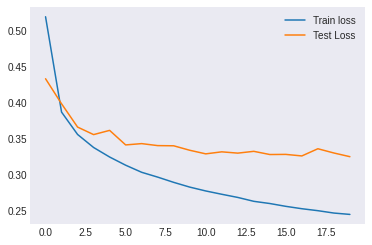

In [38]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

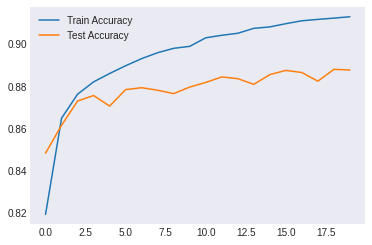

In [37]:
# Visualize the accuracy
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend();